In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [106]:
path = "https://compbio.fmph.uniba.sk/vyuka/pridav/data/nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [107]:
Y = data["Gender"].to_numpy()
X = data[["Weight", "Height"]].to_numpy()
X

array([[ 64.7, 163. ],
       [ 54. , 153. ],
       [ 61.4, 165. ],
       ...,
       [ 86.5, 175. ],
       [ 58. , 163. ],
       [ 76.2, 168. ]])

In [108]:
# Trenovacia a validacna
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

# Standardizacia
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

X_train

array([[ 82. , 163. ],
       [ 65.1, 182. ],
       [100.6, 180. ],
       ...,
       [114. , 184. ],
       [ 53.6, 150. ],
       [ 96.3, 179. ]])

In [109]:
# Najblizsi sused
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [110]:
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
accuracy

0.7429718875502008

In [111]:
# Rozhodovacia hranica
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0, 0.5, 'Height')

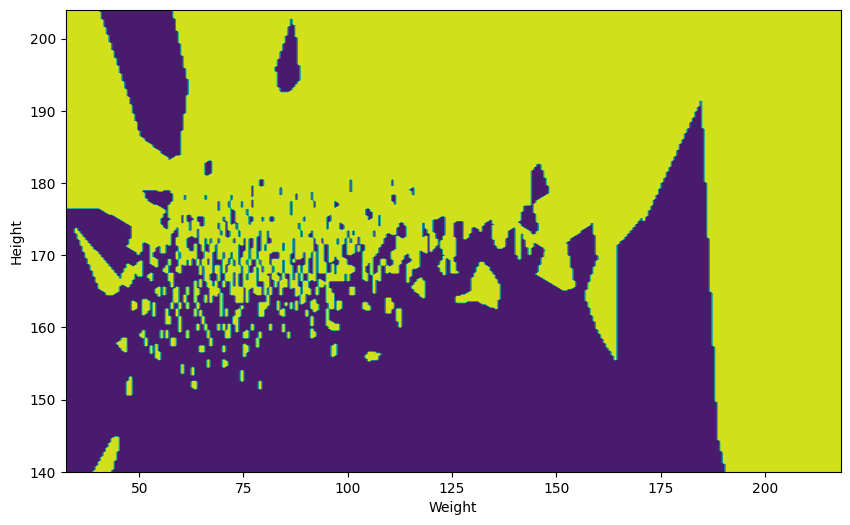

In [112]:
# dokreslenie
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

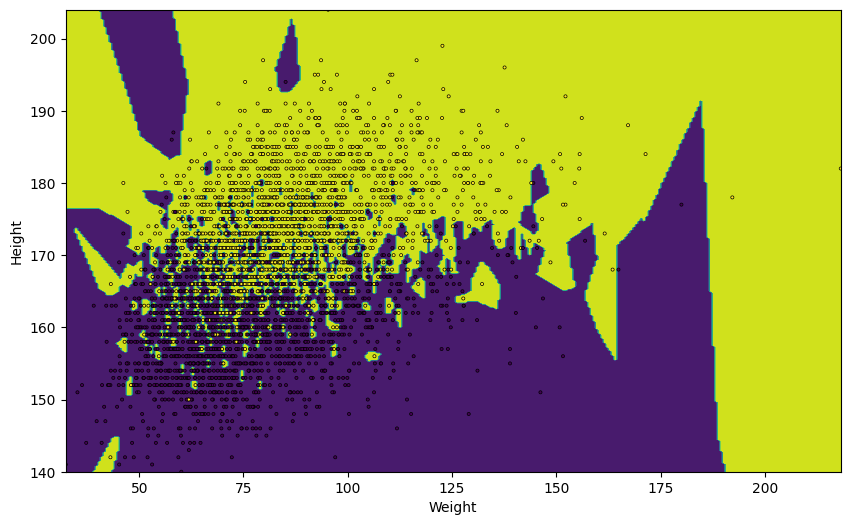

In [113]:
# aj s trenovacimi bodmi
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')

In [119]:
# k-NN
k = 35  # pocet susedov
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(X_train, y_train)

y_pred = knn2.predict(X_val)
accuracy = accuracy_score(y_val, y_pred) # pocet spravnych predikcii / pocet predikcii
accuracy

0.8132530120481928

Text(0, 0.5, 'Height')

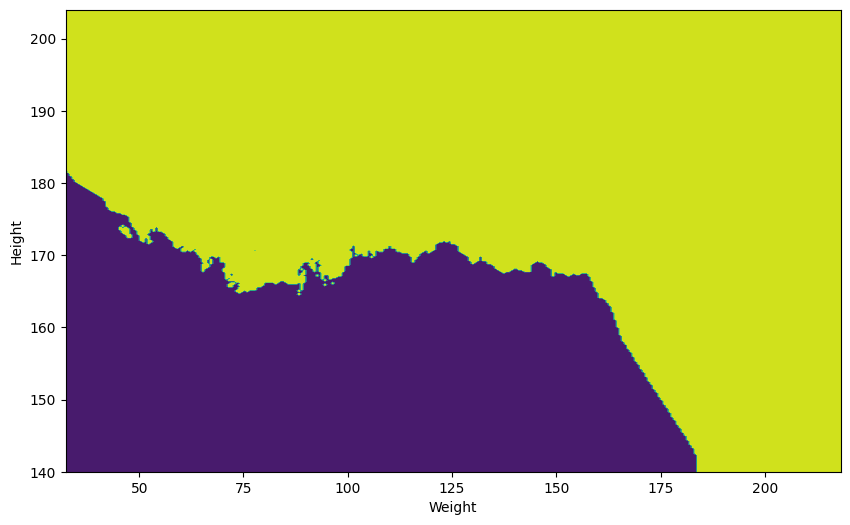

In [120]:
# Rozhodovacia hranica
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

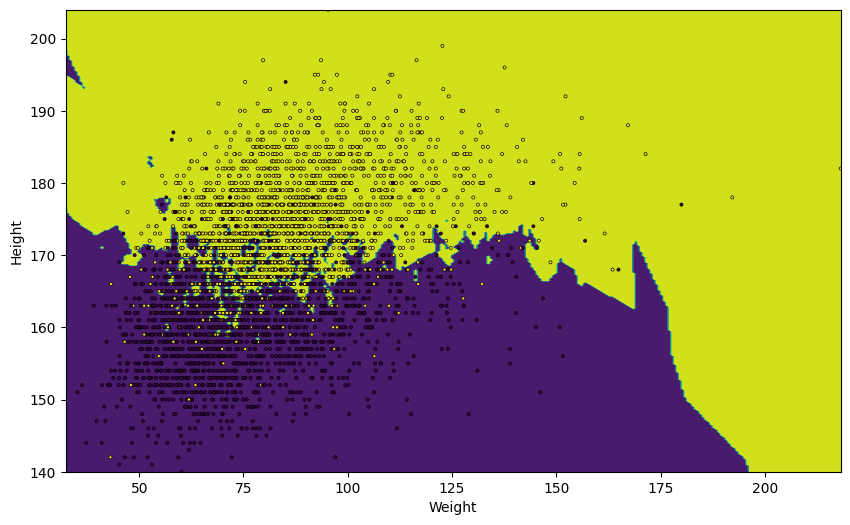

In [116]:
# aj s trenovacimi bodmi
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolor='k', linewidths=0.5, s=5, marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')